In [ ]:
import torch
import torchvision
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from torchvision import datasets, transforms
from torch import nn, optim
from time import time

In [ ]:
#downloading training and test data
training_data=torchvision.datasets.MNIST('/content', train=True, transform=transforms.ToTensor(), download=True)
test_data=torchvision.datasets.MNIST('/content', train=False, transform=transforms.ToTensor(), download=True)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting /content/MNIST/raw/train-images-idx3-ubyte.gz to /content/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting /content/MNIST/raw/train-labels-idx1-ubyte.gz to /content/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting /content/MNIST/raw/t10k-images-idx3-ubyte.gz to /content/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting /content/MNIST/raw/t10k-labels-idx1-ubyte.gz to /content/MNIST/raw



In [ ]:
#loading the DL'd data
train_data_loader=torch.utils.data.DataLoader(dataset=training_data, batch_size=100,shuffle=True)
test_data_loader=torch.utils.data.DataLoader(dataset=test_data, batch_size=100, shuffle=True)

In [ ]:
#separating sample and labels
var=iter(train_data_loader)
samples, labels=next(var)  #one sample: 1x28x28, 100 samples: 100x1x28x28

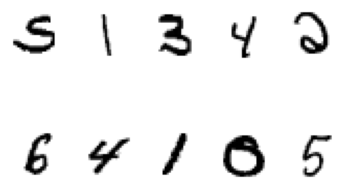

In [ ]:
#printing images from dataset
#not necessary to do
#line 8-> instead of squeezing the extra dimension, we specify axes for traversal
plt.figure
for i in range(10):
  plt.subplot(2,5,i+1)   #establish grid
  plt.axis('off')       #doesnt plot axes
  plt.imshow(samples[i][0], cmap='gray_r')   #gray for white digit, gray_r for reverse
plt.show()

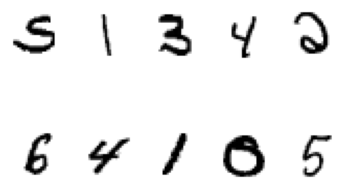

In [ ]:
#printing images from dataset
#not necessary to do
#samples is a 1x28x28 array. to print the image, we need only 28x28
#line 9-> numpy.squeeze will remove the extra dimension from samples
plt.figure
for i in range(10):
  plt.subplot(2,5,i+1)   #establish grid
  plt.axis('off')       #doesnt plot axes
  plt.imshow(samples[i].numpy().squeeze(), cmap='gray_r')   #gray for white digit, gray_r for reverse
plt.show()

In [ ]:
input_size = 784  #28x28 pixel grid is flattened
h_layer_sizes=[256,128, 64]
output_size=10

model= nn.Sequential(nn.Linear(input_size, h_layer_sizes[0]),
                     nn.ReLU(),
                     nn.Linear(h_layer_sizes[0], h_layer_sizes[1]),
                     nn.ReLU(),
                     nn.Linear(h_layer_sizes[1], h_layer_sizes[2]),
                     nn.ReLU(),
                     nn.Linear(h_layer_sizes[2], output_size),
                     nn.LogSoftmax(dim=1) )
print(model)

Sequential(
  (0): Linear(in_features=784, out_features=256, bias=True)
  (1): ReLU()
  (2): Linear(in_features=256, out_features=128, bias=True)
  (3): ReLU()
  (4): Linear(in_features=128, out_features=64, bias=True)
  (5): ReLU()
  (6): Linear(in_features=64, out_features=10, bias=True)
  (7): LogSoftmax(dim=1)
)


In [ ]:
#defining cost function
criteria=nn.NLLLoss()
images, labels = next(iter(train_data_loader))
images=images.view(images.shape[0], -1)

logps=model(images) #log probabilities-->output of model
cost=criteria(logps, labels)  #calculate NLL Loss


In [ ]:
#training and validation loops together
optimizer=optim.SGD(model.parameters(), lr=0.01, momentum=0.8)
time0=time()

trloss=[]
tracc=[]
teloss=[]
teacc=[]

epochs=15  #no of traversals through MNIST dataset
for e in range(epochs):
  running_cost=0
  testing_cost=0
  #training
  correct=0
  for images, labels in train_data_loader:
    #flatten images
    images=images.view(images.shape[0], -1)
    #train the network using 5 steps:

    #step 1 forward
    output=model(images)

    #step 2 compute cost function
    cost=criteria(output, labels)

    #step 3 cleaning the gradient
    optimizer.zero_grad()

    #step 4 accumulate partial derivaties of cost wrt parameters ie. backprop
    cost.backward()

    #step 5 step in the oppsite direction of the gradient
    optimizer.step()

    running_cost+=cost.item()

    #training_accuracy
    pred = torch.argmax(output, dim = 1)
    correct+= (pred==labels).sum().item()
  accuracy=correct/len(training_data)
  var_trloss=running_cost/len(train_data_loader)
  print("Epoch {} - Training Loss: {}".format(e+1,var_trloss))  #computing average of cost function over all training data
  trloss.append(var_trloss)
  tracc.append(accuracy)
#validation loop
  correct_count=0
  for images, labels in test_data_loader:
    img = images.view(images.shape[0], -1)

    with torch.no_grad():
      logps= model(img)

    te_cost=criteria(logps, labels)

    testing_cost += te_cost.item()

    #testing_accuracy
    preds = torch.argmax(logps, dim = 1)
    correct_count += (preds == labels).sum()
  te_acc=correct_count.item()/len(test_data)
  var_teloss=testing_cost/len(test_data_loader)
  print("Epoch {} - Testing Loss: {}".format(e+1,var_teloss))
  teloss.append(var_teloss)
  teacc.append(te_acc)
  print("Model Accuracy (in percentage)=", te_acc*100, "cc=", correct_count.item(), "ac=", len(test_data))
print("\n Training Time (in minutes) =", (time()-time0)/60)

Epoch 1 - Training Loss: 1.2458642133573692
Epoch 1 - Testing Loss: 0.39567068561911584
Model Accuracy (in percentage)= 88.4 cc= 8840 ac= 10000
Epoch 2 - Training Loss: 0.3467530490209659
Epoch 2 - Testing Loss: 0.2861245535314083
Model Accuracy (in percentage)= 91.49000000000001 cc= 9149 ac= 10000
Epoch 3 - Training Loss: 0.24615400711695354
Epoch 3 - Testing Loss: 0.20379265792667867
Model Accuracy (in percentage)= 94.08999999999999 cc= 9409 ac= 10000
Epoch 4 - Training Loss: 0.1880177065047125
Epoch 4 - Testing Loss: 0.16165980972349644
Model Accuracy (in percentage)= 95.13000000000001 cc= 9513 ac= 10000
Epoch 5 - Training Loss: 0.1492766384811451
Epoch 5 - Testing Loss: 0.14428597755730152
Model Accuracy (in percentage)= 95.81 cc= 9581 ac= 10000
Epoch 6 - Training Loss: 0.12353683529421687
Epoch 6 - Testing Loss: 0.12364506874233484
Model Accuracy (in percentage)= 96.25 cc= 9625 ac= 10000
Epoch 7 - Training Loss: 0.1043875525239855
Epoch 7 - Testing Loss: 0.1139506658539176
Model A

Text(0, 0.5, 'Losses')

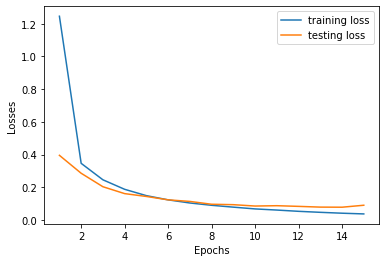

In [ ]:
#plotting training loss and testing loss
plt.figure
aXis=[]
for i in range(0,epochs):
  aXis.append(i+1)
plt.plot(aXis, trloss, label="training loss")
plt.plot(aXis, teloss, label="testing loss")
plt.legend(loc="upper right")
plt.xlabel("Epochs")
plt.ylabel("Losses")


Text(0, 0.5, 'Accuracy')

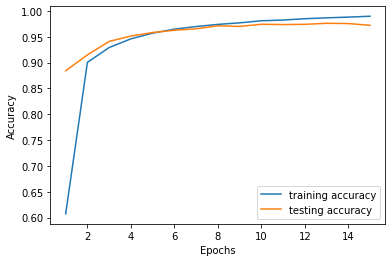

In [ ]:
#plotting training accuracy and testing accuracy
plt.figure
aXis=[]
for i in range(0,epochs):
  aXis.append(i+1)
plt.plot(aXis, tracc, label="training accuracy")
plt.plot(aXis, teacc, label="testing accuracy")
plt.legend(loc="lower right")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")

# Different approaches explained


These are the basic steps I followed to build the model. There were some variations in a few steps, those are mentioned below as well
1.   Import relevant libraries
2.   Download dataset  
3.   Define training and test data, load it.
4.   Print some samples of the data
Two approaches to print images one specifies array indices, other uses numpy.squeeze
5.   Define the model
6.   Train the network
Forward prop
Computing cost function
Cleaning the gradient
Backprop
Step in the opposite direction to the gradient
7.  Test the model
8. Plot training and testing loss and accuracy to determine if and when overfitting occurs



I tried changing 2 major things in my code-

a. Cost function-

  i. Used logsoftmax() at the end (while defining the model) and subsequently, used NLLLoss to compute the cost function.

  ii. Did not use logsoftmax() at  end and used crossentropyloss for computing the cost function.

b.  Training and Testing

  i. Used separate loops for training and testing the model

  ii. Used a single loop and tested the model after each epoch

This was done majorly so that I could visualize the convergence of the model. And also so that I could collect accuracy and loss data after each epoch, to plot those and check if any overfitting is occuring.

The other thing I fiddled around with was the number of perceptron layers in the model. Number of layers defines the complexity of the network and while it makes it easier for the network to learn, too many layers lead to overfitting. I also fiddled around with batch size and learning rate. These two do not cause overfitting, but definitely do affect how fast the network learns, and how accurate it can get. I started with 5 perceptron layers between input and output, increased to 10, and then decreased to the current number of 3 hidden layers between input and output layer.
Changing epoch number by an extreme amount also led to overfitting. Training for long on the same dataset has a higher chance of causing overfitting, thus explaining the results I obtained.

Using the training accuracy vs testing accuracy plot, I could identify overfitting in the network with 10 layers, and hence, I started to decrease the number of layers in the model.


# Convergence and Overfitting


An untrained network starts with random weights and starts to “learn” by computing the gradient of an objective function and then adjusting weights accordingly (backprop). This process repeats and the weights get updated such that the value of the objective function decreases each time. Convergence happens when the objective function is minimized. The concept can be visualized as a measure of how close the model is to an ideal network.

Overfitting occurs when the model performs very well on the training data, but doesn’t translate that on the test data. It happens when the model is too complex relative to the amount of data. That can be because Increasing the number of hidden layers increases the amount of weights and if there isn't enough data to work with, it will cause the network to essentially memorize the training set. So training accuracy will be very high. But since the network can’t generalize well for new data, testing accuracy will dip. (This is how accuracy plots helped in identifying overfitting.)
